In [1446]:
# Importing dependencies
import matplotlib.pyplot as plt
import numpy as np
from numpy import absolute
import pandas as pd
import seaborn as sns
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import xgboost
from xgboost import XGBRegressor
import tensorflow as tf
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.10.0


In [1447]:
pwd()

'C:\\Users\\John\\Documents\\Berkeley\\Classwork\\group project\\ML-branch\\Group_Project'

In [1448]:
data = pd.read_csv('C:\\Users\\John\\Documents\\Berkeley\\Classwork\\group project\\data\\Albert_cleaned_sets\\percaps_w_legality.csv', index_col=0)

In [1449]:
data.head(10)

,Population,Year,Cannabis Users 12+,Cannabis Consumption Percentage,Opioid Deaths,Opioid Deaths Percentage,Total Drug Deaths,Total Drug Deaths Percentage,Recreational,Rec Year Legalized,Medical,Med Year Legalized,Years legal (rec),Years legal (med),Status
State,,,,,,,,,,,,,,,
Alabama,4843737,2014,404000,8.34,303,0.0063,723,0.0149,0,0,1,2021,0,1,Medical
Alabama,4854803,2015,389000,8.01,308,0.0063,736,0.0152,0,0,1,2021,0,1,Medical
Alabama,4866824,2016,386000,7.93,411,0.0084,756,0.0155,0,0,1,2021,0,1,Medical
Alabama,4877989,2017,429000,8.79,494,0.0101,835,0.0171,0,0,1,2021,0,1,Medical
Alabama,4891628,2018,514000,10.51,442,0.0090,775,0.0158,0,0,1,2021,0,1,Medical
Alabama,4907965,2019,605000,12.33,521,0.0106,768,0.0156,0,0,1,2021,0,1,Medical
Alabama,5024803,2020,608000,12.10,728,0.0145,1029,0.0205,0,0,1,2021,0,1,Medical
Alaska,737075,2014,114000,15.47,91,0.0123,124,0.0168,1,2014,1,1998,8,24,Both
Alaska,738430,2015,127000,17.20,112,0.0152,122,0.0165,1,2014,1,1998,8,24,Both


In [1450]:
# Resetting index for State manipulation
data = data.reset_index()
data.head()

,State,Population,Year,Cannabis Users 12+,Cannabis Consumption Percentage,Opioid Deaths,Opioid Deaths Percentage,Total Drug Deaths,Total Drug Deaths Percentage,Recreational,Rec Year Legalized,Medical,Med Year Legalized,Years legal (rec),Years legal (med),Status
0,Alabama,4843737,2014,404000,8.34,303,0.0063,723,0.0149,0,0,1,2021,0,1,Medical
1,Alabama,4854803,2015,389000,8.01,308,0.0063,736,0.0152,0,0,1,2021,0,1,Medical
2,Alabama,4866824,2016,386000,7.93,411,0.0084,756,0.0155,0,0,1,2021,0,1,Medical
3,Alabama,4877989,2017,429000,8.79,494,0.0101,835,0.0171,0,0,1,2021,0,1,Medical
4,Alabama,4891628,2018,514000,10.51,442,0.0090,775,0.0158,0,0,1,2021,0,1,Medical


In [1451]:
# Checking for null values
data.isna().sum()

State                              0
Population                         0
Year                               0
Cannabis Users 12+                 0
Cannabis Consumption Percentage    0
Opioid Deaths                      0
Opioid Deaths Percentage           0
Total Drug Deaths                  0
Total Drug Deaths Percentage       0
Recreational                       0
Rec Year Legalized                 0
Medical                            0
Med Year Legalized                 0
Years legal (rec)                  0
Years legal (med)                  0
Status                             0
dtype: int64

In [1452]:
# Checking datatypes
data.dtypes

State                               object
Population                           int64
Year                                 int64
Cannabis Users 12+                   int64
Cannabis Consumption Percentage    float64
Opioid Deaths                        int64
Opioid Deaths Percentage           float64
Total Drug Deaths                    int64
Total Drug Deaths Percentage       float64
Recreational                         int64
Rec Year Legalized                   int64
Medical                              int64
Med Year Legalized                   int64
Years legal (rec)                    int64
Years legal (med)                    int64
Status                              object
dtype: object

In [1453]:
# Label encoding
le = preprocessing.LabelEncoder()
data.State = le.fit_transform(data.State)
data.head()

,State,Population,Year,Cannabis Users 12+,Cannabis Consumption Percentage,Opioid Deaths,Opioid Deaths Percentage,Total Drug Deaths,Total Drug Deaths Percentage,Recreational,Rec Year Legalized,Medical,Med Year Legalized,Years legal (rec),Years legal (med),Status
0,0,4843737,2014,404000,8.34,303,0.0063,723,0.0149,0,0,1,2021,0,1,Medical
1,0,4854803,2015,389000,8.01,308,0.0063,736,0.0152,0,0,1,2021,0,1,Medical
2,0,4866824,2016,386000,7.93,411,0.0084,756,0.0155,0,0,1,2021,0,1,Medical
3,0,4877989,2017,429000,8.79,494,0.0101,835,0.0171,0,0,1,2021,0,1,Medical
4,0,4891628,2018,514000,10.51,442,0.0090,775,0.0158,0,0,1,2021,0,1,Medical


In [1454]:
# Splitting status into dummies features
data = pd.get_dummies(data, columns = ['Status'])

In [1455]:
# Checking datatypes
data.dtypes

State                                int32
Population                           int64
Year                                 int64
Cannabis Users 12+                   int64
Cannabis Consumption Percentage    float64
Opioid Deaths                        int64
Opioid Deaths Percentage           float64
Total Drug Deaths                    int64
Total Drug Deaths Percentage       float64
Recreational                         int64
Rec Year Legalized                   int64
Medical                              int64
Med Year Legalized                   int64
Years legal (rec)                    int64
Years legal (med)                    int64
Status_Both                          uint8
Status_Medical                       uint8
Status_Neither                       uint8
dtype: object

In [1456]:
# Setting pandas dataframe display options to unlimited viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1457]:
data.head()

,State,Population,Year,Cannabis Users 12+,Cannabis Consumption Percentage,Opioid Deaths,Opioid Deaths Percentage,Total Drug Deaths,Total Drug Deaths Percentage,Recreational,Rec Year Legalized,Medical,Med Year Legalized,Years legal (rec),Years legal (med),Status_Both,Status_Medical,Status_Neither
0,0,4843737,2014,404000,8.34,303,0.0063,723,0.0149,0,0,1,2021,0,1,0,1,0
1,0,4854803,2015,389000,8.01,308,0.0063,736,0.0152,0,0,1,2021,0,1,0,1,0
2,0,4866824,2016,386000,7.93,411,0.0084,756,0.0155,0,0,1,2021,0,1,0,1,0
3,0,4877989,2017,429000,8.79,494,0.0101,835,0.0171,0,0,1,2021,0,1,0,1,0
4,0,4891628,2018,514000,10.51,442,0.0090,775,0.0158,0,0,1,2021,0,1,0,1,0


In [1458]:
# XGBOOST

In [1459]:
# split data into input and output columns
X, y = data.drop('Opioid Deaths', axis = 1), data['Opioid Deaths']

In [1460]:
# create an xgboost regression model
model = XGBRegressor(n_estimators=500, max_depth=50, eta=0.01, subsample=0.8, colsample_bytree=0.9, tree_method="hist", eval_metric=mean_absolute_error)

In [1461]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [1462]:
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 105.667 (53.101)


In [1463]:
# XGBreg with KFold seems to deliver best MAE with dnn_model a close second.

In [1464]:
# Splitting train and test to have X_train and X_test specifically include every year but 2019 and 2020 and y_train and y_test to exclusively carry the years 2019 and 2020. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.285, shuffle = False)

In [1465]:
# fit model
model.fit(X_train, y_train, eval_set = [(X_train,y_train)])

[0]	validation_0-rmse:1774.63572	validation_0-mean_absolute_error:1167.32727
[1]	validation_0-rmse:1758.81808	validation_0-mean_absolute_error:1156.41589
[2]	validation_0-rmse:1743.15154	validation_0-mean_absolute_error:1145.52307
[3]	validation_0-rmse:1727.76401	validation_0-mean_absolute_error:1134.82996
[4]	validation_0-rmse:1712.41948	validation_0-mean_absolute_error:1124.27783
[5]	validation_0-rmse:1696.48468	validation_0-mean_absolute_error:1113.53674
[6]	validation_0-rmse:1681.07907	validation_0-mean_absolute_error:1102.91980
[7]	validation_0-rmse:1665.84055	validation_0-mean_absolute_error:1092.34143
[8]	validation_0-rmse:1650.84694	validation_0-mean_absolute_error:1082.03760
[9]	validation_0-rmse:1635.58246	validation_0-mean_absolute_error:1071.57019
[10]	validation_0-rmse:1620.26597	validation_0-mean_absolute_error:1061.17273
[11]	validation_0-rmse:1605.63409	validation_0-mean_absolute_error:1051.16943
[12]	validation_0-rmse:1591.10309	validation_0-mean_absolute_error:1041.29

[107]	validation_0-rmse:694.58407	validation_0-mean_absolute_error:426.91034
[108]	validation_0-rmse:688.86433	validation_0-mean_absolute_error:422.97546
[109]	validation_0-rmse:683.36967	validation_0-mean_absolute_error:419.12021
[110]	validation_0-rmse:677.76373	validation_0-mean_absolute_error:415.28070
[111]	validation_0-rmse:671.87544	validation_0-mean_absolute_error:411.30682
[112]	validation_0-rmse:666.44798	validation_0-mean_absolute_error:407.51144
[113]	validation_0-rmse:660.87348	validation_0-mean_absolute_error:403.84811
[114]	validation_0-rmse:655.55543	validation_0-mean_absolute_error:400.13794
[115]	validation_0-rmse:650.63738	validation_0-mean_absolute_error:396.58536
[116]	validation_0-rmse:645.40555	validation_0-mean_absolute_error:392.98441
[117]	validation_0-rmse:639.92715	validation_0-mean_absolute_error:389.32733
[118]	validation_0-rmse:634.47677	validation_0-mean_absolute_error:385.73065
[119]	validation_0-rmse:629.42512	validation_0-mean_absolute_error:382.25418

[214]	validation_0-rmse:302.05930	validation_0-mean_absolute_error:164.00496
[215]	validation_0-rmse:300.09264	validation_0-mean_absolute_error:162.61587
[216]	validation_0-rmse:297.85543	validation_0-mean_absolute_error:161.18823
[217]	validation_0-rmse:295.55457	validation_0-mean_absolute_error:159.73811
[218]	validation_0-rmse:293.52123	validation_0-mean_absolute_error:158.40598
[219]	validation_0-rmse:291.25140	validation_0-mean_absolute_error:157.03310
[220]	validation_0-rmse:289.01893	validation_0-mean_absolute_error:155.67120
[221]	validation_0-rmse:287.03952	validation_0-mean_absolute_error:154.36096
[222]	validation_0-rmse:284.85836	validation_0-mean_absolute_error:153.01991
[223]	validation_0-rmse:282.84753	validation_0-mean_absolute_error:151.67387
[224]	validation_0-rmse:280.97902	validation_0-mean_absolute_error:150.44405
[225]	validation_0-rmse:278.76851	validation_0-mean_absolute_error:149.06885
[226]	validation_0-rmse:276.93733	validation_0-mean_absolute_error:147.75617

[322]	validation_0-rmse:142.43804	validation_0-mean_absolute_error:65.89294
[323]	validation_0-rmse:141.45247	validation_0-mean_absolute_error:65.34764
[324]	validation_0-rmse:140.70236	validation_0-mean_absolute_error:64.85751
[325]	validation_0-rmse:139.64830	validation_0-mean_absolute_error:64.30559
[326]	validation_0-rmse:138.71239	validation_0-mean_absolute_error:63.78293
[327]	validation_0-rmse:137.75272	validation_0-mean_absolute_error:63.28569
[328]	validation_0-rmse:136.81896	validation_0-mean_absolute_error:62.76794
[329]	validation_0-rmse:135.83426	validation_0-mean_absolute_error:62.25809
[330]	validation_0-rmse:134.91667	validation_0-mean_absolute_error:61.74445
[331]	validation_0-rmse:133.93527	validation_0-mean_absolute_error:61.21152
[332]	validation_0-rmse:133.14905	validation_0-mean_absolute_error:60.75411
[333]	validation_0-rmse:132.22075	validation_0-mean_absolute_error:60.25744
[334]	validation_0-rmse:131.28376	validation_0-mean_absolute_error:59.76796
[335]	valida

[431]	validation_0-rmse:70.67977	validation_0-mean_absolute_error:28.31736
[432]	validation_0-rmse:70.26083	validation_0-mean_absolute_error:28.07361
[433]	validation_0-rmse:69.76306	validation_0-mean_absolute_error:27.88108
[434]	validation_0-rmse:69.38731	validation_0-mean_absolute_error:27.68671
[435]	validation_0-rmse:68.91368	validation_0-mean_absolute_error:27.48394
[436]	validation_0-rmse:68.41048	validation_0-mean_absolute_error:27.25523
[437]	validation_0-rmse:68.03223	validation_0-mean_absolute_error:27.05215
[438]	validation_0-rmse:67.54508	validation_0-mean_absolute_error:26.83462
[439]	validation_0-rmse:67.08372	validation_0-mean_absolute_error:26.63860
[440]	validation_0-rmse:66.72515	validation_0-mean_absolute_error:26.46373
[441]	validation_0-rmse:66.35750	validation_0-mean_absolute_error:26.28697
[442]	validation_0-rmse:65.88054	validation_0-mean_absolute_error:26.07989
[443]	validation_0-rmse:65.43211	validation_0-mean_absolute_error:25.88757
[444]	validation_0-rmse:6

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False, eta=0.01,
             eval_metric=<function mean_absolute_error at 0x0000016198F1EC20>,
             gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.00999999978,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=50,
             max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [1466]:
# Confining result metric lists to variables
rmse = model.evals_result()['validation_0']['rmse']
mae = model.evals_result()['validation_0']['mean_absolute_error']

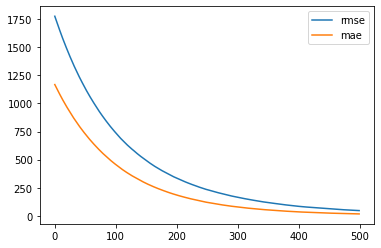

In [1467]:
# plot learning curves
plt.plot(rmse, label='rmse')
plt.plot(mae, label='mae')
# show the legend
plt.legend()
# show the plot
plt.show()

In [1468]:
# Wow, this model fit has incredible results for RMSE and MAE. XGBoost is quite the performer for small datasets after 500 epochs.

In [1469]:
# Create predictions from X_test
y_pr = model.predict(X_test)

In [1470]:
# Inspect predictions
y_pr

array([ 456.976,  402.056,  328.015,  436.247,  374.794,  374.372,
        373.054,  378.936,  424.842,  412.781,  557.995, 2064.984,
       2951.551, 4265.347, 4911.854, 4350.011, 4326.595, 5389.708,
        233.879,  343.076,  337.373,  337.132,  335.803,  308.73 ,
        434.687,  370.329,  395.818,  471.403,  819.442, 1064.039,
       1089.8  , 1458.562,   21.158,   18.457,   30.703,   28.53 ,
         17.447,   34.229,   46.005,  759.809, 1079.341, 1321.835,
       1437.078, 1506.593, 2304.333, 3332.954, 1761.81 , 1821.61 ,
       2059.189, 2109.643, 2180.968, 2229.129, 3219.658,  473.345,
        478.825,  478.758,  476.291,  482.212,  452.242,  483.626,
         58.428,   75.449,  164.252,  171.026,  182.511,  172.359,
        191.405,  795.871,  861.243, 1159.918, 1222.776, 1225.811,
       1337.239, 2440.136,  759.104,  823.064,  829.52 ,  954.194,
        951.305, 1001.143, 1397.09 ,  476.482,  510.501,  641.863,
        933.62 ,  666.549,  666.203, 1177.45 ,  468.715,  471.

In [1471]:
y_test

255     420
256     338
257     290
258     354
259     353
260     356
261     331
262     371
263     408
264     375
265     584
266    1212
267    1641
268    2982
269    3429
270    3988
271    4113
272    5151
273     242
274     307
275     325
276     319
277     328
278     285
279     384
280     570
281     640
282     750
283     914
284    1081
285    1124
286    1845
287      20
288      10
289      35
290      28
291      13
292      39
293      49
294     905
295    1166
296    1417
297    1562
298    1763
299    2054
300    3049
301    1169
302    1326
303    1420
304    1581
305    1596
306    1704
307    2486
308     592
309     591
310     600
311     575
312     558
313     519
314     540
315      75
316      91
317     134
318     159
319     194
320     162
321     219
322     857
323     966
324    1518
325    1804
326    1729
327    1849
328    2555
329     754
330     740
331     790
332     818
333     859
334     960
335    1401
336     683
337     796
338 

In [1472]:
y_pr

array([ 456.976,  402.056,  328.015,  436.247,  374.794,  374.372,
        373.054,  378.936,  424.842,  412.781,  557.995, 2064.984,
       2951.551, 4265.347, 4911.854, 4350.011, 4326.595, 5389.708,
        233.879,  343.076,  337.373,  337.132,  335.803,  308.73 ,
        434.687,  370.329,  395.818,  471.403,  819.442, 1064.039,
       1089.8  , 1458.562,   21.158,   18.457,   30.703,   28.53 ,
         17.447,   34.229,   46.005,  759.809, 1079.341, 1321.835,
       1437.078, 1506.593, 2304.333, 3332.954, 1761.81 , 1821.61 ,
       2059.189, 2109.643, 2180.968, 2229.129, 3219.658,  473.345,
        478.825,  478.758,  476.291,  482.212,  452.242,  483.626,
         58.428,   75.449,  164.252,  171.026,  182.511,  172.359,
        191.405,  795.871,  861.243, 1159.918, 1222.776, 1225.811,
       1337.239, 2440.136,  759.104,  823.064,  829.52 ,  954.194,
        951.305, 1001.143, 1397.09 ,  476.482,  510.501,  641.863,
        933.62 ,  666.549,  666.203, 1177.45 ,  468.715,  471.

In [1473]:
len(y_pr)

102

Text(0, 0.5, 'Predictions')

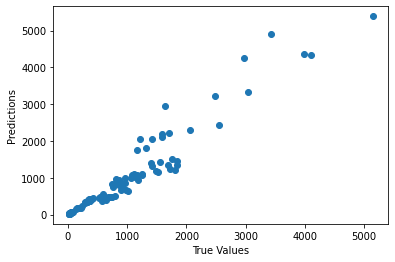

In [1474]:
# Comparing y_test with y_predictions
plt.scatter(y_test, y_pr)
plt.xlabel('True Values')
plt.ylabel('Predictions')

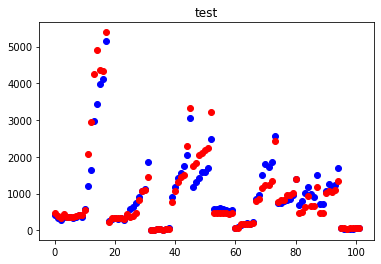

In [1475]:
# Plotting data points of y_test (blue) and y_predictions (red).
plotGraph(y_test, y_pr, "test")

In [1476]:
# Inserting zeros for all prior years to 2019 and 2020 to reform the length of the predictions list to comply with original dataframe.
for item in range(int(255)):
    y_pr = np.insert(y_pr, 0,0)

In [1477]:
# Checking to see if length matches original dataframe.
len(y_pr)

357

In [1478]:
len(data)

357

In [1479]:
# Storing updated y_predictions list in dataframe.
data['Opioid_death_predictions_XGBoost_2019-2020'] = y_pr

In [1480]:
# Reversing Label Encoder to return State feature to it's original state.
data.State = le.inverse_transform(State)

In [1481]:
# Data Overview
data.head()

,State,Population,Year,Cannabis Users 12+,Cannabis Consumption Percentage,Opioid Deaths,Opioid Deaths Percentage,Total Drug Deaths,Total Drug Deaths Percentage,Recreational,Rec Year Legalized,Medical,Med Year Legalized,Years legal (rec),Years legal (med),Status_Both,Status_Medical,Status_Neither,Opioid_death_predictions_XGBoost_2019-2020
0,Alabama,4843737,2014,404000,8.34,303,0.0063,723,0.0149,0,0,1,2021,0,1,0,1,0,0.0
1,Alabama,4854803,2015,389000,8.01,308,0.0063,736,0.0152,0,0,1,2021,0,1,0,1,0,0.0
2,Alabama,4866824,2016,386000,7.93,411,0.0084,756,0.0155,0,0,1,2021,0,1,0,1,0,0.0
3,Alabama,4877989,2017,429000,8.79,494,0.0101,835,0.0171,0,0,1,2021,0,1,0,1,0,0.0
4,Alabama,4891628,2018,514000,10.51,442,0.0090,775,0.0158,0,0,1,2021,0,1,0,1,0,0.0


In [1482]:
# Store new dataframe with predictions
data.to_csv('C:\\Users\\John\\Documents\\Berkeley\\Classwork\\group project\\data\\percaps_w_legality_and_predictions.csv',index=False)